In [133]:
# imports

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score # might never use this one, if so, remove

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# others
import graphviz
from graphviz import Graph

# Custom module imports
import acquire as a
import prepare as p
import explore as e

In [134]:
# read raw data info a dataframe (df)
df = a.get_telco_data()

In [135]:
# let's use the prepare.py module to implement findings above and clean data
df = p.clean_telco(df)

In [136]:
# split the df before encoding to prepare for exploration using function from prepare.py
train, validate, test = p.split_telco(df)

In [137]:
# check proportions of splits
print(f'Proportion of train: {train.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of validate: {validate.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of test: {test.shape[0]/df.shape[0]:.2f}')

Proportion of train: 0.60
Proportion of validate: 0.20
Proportion of test: 0.20


In [138]:
# create a list of all numeric columns to use below in function
quant_vars = train.select_dtypes(include = ['number']).columns.tolist()
quant_vars

['tenure', 'monthly_charges', 'total_charges']

In [139]:
# create a list of all categorical columns to use below in function
cat_vars = train.select_dtypes(include = 'object').columns.tolist()
cat_vars

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'internet_service_type',
 'contract_type',
 'payment_type']

In [140]:
# we need to remove the target variable from our list of cat_vars
cat_vars.pop(13)

'churn'

In [141]:
cat_vars

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'internet_service_type',
 'contract_type',
 'payment_type']

In [142]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
6169,Female,No,Yes,No,72,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,105.50,7544.00,No,Fiber optic,Two year,Electronic check
3290,Female,No,Yes,Yes,28,Yes,Yes,No,No,No,No,No,No,No,49.90,1410.25,No,DSL,Month-to-month,Mailed check
3615,Male,No,Yes,No,5,No,No,No,No,No,No,No,No,Yes,24.95,100.40,Yes,DSL,Month-to-month,Electronic check
6309,Male,No,No,Yes,39,Yes,Yes,No,No,No,Yes,Yes,Yes,No,100.55,3895.35,No,Fiber optic,Two year,Mailed check
856,Male,Yes,No,No,45,Yes,Yes,No,No,No,No,Yes,Yes,Yes,93.90,4200.25,No,Fiber optic,Month-to-month,Bank transfer (automatic)


In [143]:
train_temp = train.copy()

In [144]:
train_temp.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
6169,Female,No,Yes,No,72,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,105.50,7544.00,No,Fiber optic,Two year,Electronic check
3290,Female,No,Yes,Yes,28,Yes,Yes,No,No,No,No,No,No,No,49.90,1410.25,No,DSL,Month-to-month,Mailed check
3615,Male,No,Yes,No,5,No,No,No,No,No,No,No,No,Yes,24.95,100.40,Yes,DSL,Month-to-month,Electronic check
6309,Male,No,No,Yes,39,Yes,Yes,No,No,No,Yes,Yes,Yes,No,100.55,3895.35,No,Fiber optic,Two year,Mailed check
856,Male,Yes,No,No,45,Yes,Yes,No,No,No,No,Yes,Yes,Yes,93.90,4200.25,No,Fiber optic,Month-to-month,Bank transfer (automatic)


In [145]:
train_temp.churn = train_temp.churn.replace(to_replace='Yes', value=1)
train_temp.churn = train_temp.churn.replace(to_replace='No', value=0)

In [147]:
train_temp.head().T

,6169,3290,3615,6309,856
gender,Female,Female,Male,Male,Male
senior_citizen,No,No,No,No,Yes
partner,Yes,Yes,Yes,No,No
dependents,No,Yes,No,Yes,No
tenure,72,28,5,39,45
phone_service,Yes,Yes,No,Yes,Yes
multiple_lines,Yes,Yes,No,Yes,Yes
online_security,Yes,No,No,No,No
online_backup,No,No,No,No,No
device_protection,Yes,No,No,No,No


In [148]:
train.head().T

,6169,3290,3615,6309,856
gender,Female,Female,Male,Male,Male
senior_citizen,No,No,No,No,Yes
partner,Yes,Yes,Yes,No,No
dependents,No,Yes,No,Yes,No
tenure,72,28,5,39,45
phone_service,Yes,Yes,No,Yes,Yes
multiple_lines,Yes,Yes,No,Yes,Yes
online_security,Yes,No,No,No,No
online_backup,No,No,No,No,No
device_protection,Yes,No,No,No,No


gender 
_____________________

       chi2   p-value  degrees of freedom
0  0.116092  0.733312                   1

observed:
 churn      0     1   All
gender                  
Female  1522   557  2079
Male    1582   564  2146
All     3104  1121  4225

expected:
              0           1
0  1527.388402  551.611598
1  1576.611598  569.388402


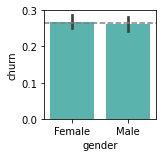


_____________________

senior_citizen 
_____________________

        chi2       p-value  degrees of freedom
0  126.71297  2.146819e-29                   1

observed:
 churn              0     1   All
senior_citizen                  
No              2699   809  3508
Yes              405   312   717
All             3104  1121  4225

expected:
              0           1
0  2577.238343  930.761657
1   526.761657  190.238343


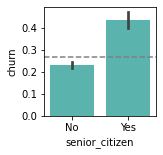


_____________________

partner 
_____________________

        chi2       p-value  degrees of freedom
0  85.438559  2.390140e-20                   1

observed:
 churn       0     1   All
partner                  
No       1470   712  2182
Yes      1634   409  2043
All      3104  1121  4225

expected:
              0           1
0  1603.059882  578.940118
1  1500.940118  542.059882


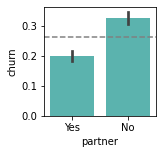


_____________________

dependents 
_____________________

         chi2       p-value  degrees of freedom
0  125.315832  4.340610e-29                   1

observed:
 churn          0     1   All
dependents                  
No          2067   945  3012
Yes         1037   176  1213
All         3104  1121  4225

expected:
              0           1
0  2212.839763  799.160237
1   891.160237  321.839763


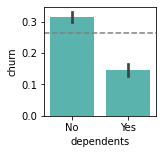


_____________________

phone_service 
_____________________

       chi2   p-value  degrees of freedom
0  1.837203  0.175279                   1

observed:
 churn             0     1   All
phone_service                  
No              308    95   403
Yes            2796  1026  3822
All            3104  1121  4225

expected:
              0            1
0   296.073846   106.926154
1  2807.926154  1014.073846


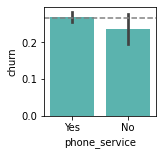


_____________________

multiple_lines 
_____________________

        chi2   p-value  degrees of freedom
0  11.507626  0.000693                   1

observed:
 churn              0     1   All
multiple_lines                  
No              1839   598  2437
Yes             1265   523  1788
All             3104  1121  4225

expected:
              0           1
0  1790.401893  646.598107
1  1313.598107  474.401893


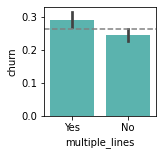


_____________________

online_security 
_____________________

        chi2       p-value  degrees of freedom
0  122.15068  2.139555e-28                   1

observed:
 churn               0     1   All
online_security                  
No               2045   936  2981
Yes              1059   185  1244
All              3104  1121  4225

expected:
              0           1
0  2190.064852  790.935148
1   913.935148  330.064852


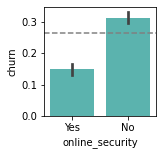


_____________________

online_backup 
_____________________

        chi2       p-value  degrees of freedom
0  28.759295  8.195561e-08                   1

observed:
 churn             0     1   All
online_backup                  
No             1945   803  2748
Yes            1159   318  1477
All            3104  1121  4225

expected:
             0          1
0  2018.88568  729.11432
1  1085.11432  391.88568


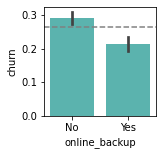


_____________________

device_protection 
_____________________

        chi2   p-value  degrees of freedom
0  21.827182  0.000003                   1

observed:
 churn                 0     1   All
device_protection                  
No                 1985   804  2789
Yes                1119   317  1436
All                3104  1121  4225

expected:
              0           1
0  2049.007337  739.992663
1  1054.992663  381.007337


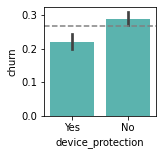


_____________________

tech_support 
_____________________

         chi2       p-value  degrees of freedom
0  114.193717  1.181803e-26                   1

observed:
 churn            0     1   All
tech_support                  
No            2059   934  2993
Yes           1045   187  1232
All           3104  1121  4225

expected:
              0           1
0  2198.880947  794.119053
1   905.119053  326.880947


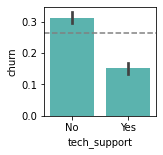


_____________________

streaming_tv 
_____________________

        chi2   p-value  degrees of freedom
0  18.401119  0.000018                   1

observed:
 churn            0     1   All
streaming_tv                  
No            1972   630  2602
Yes           1132   491  1623
All           3104  1121  4225

expected:
              0           1
0  1911.623195  690.376805
1  1192.376805  430.623195


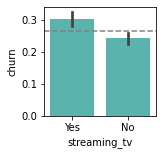


_____________________

streaming_movies 
_____________________

        chi2   p-value  degrees of freedom
0  13.076863  0.000299                   1

observed:
 churn                0     1   All
streaming_movies                  
No                1940   631  2571
Yes               1164   490  1654
All               3104  1121  4225

expected:
              0           1
0  1888.848284  682.151716
1  1215.151716  438.848284


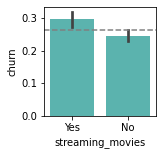


_____________________

paperless_billing 
_____________________

         chi2       p-value  degrees of freedom
0  148.148111  4.403064e-34                   1

observed:
 churn                 0     1   All
paperless_billing                  
No                 1444   287  1731
Yes                1660   834  2494
All                3104  1121  4225

expected:
              0           1
0  1271.721657  459.278343
1  1832.278343  661.721657


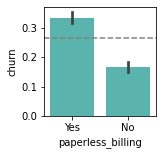


_____________________

internet_service_type 
_____________________

         chi2       p-value  degrees of freedom
0  440.801802  1.910315e-96                   2

observed:
 churn                     0     1   All
internet_service_type                  
DSL                    1160   259  1419
Fiber optic            1114   795  1909
None                    830    67   897
All                    3104  1121  4225

expected:
              0           1
0  1042.503195  376.496805
1  1402.493728  506.506272
2   659.003077  237.996923


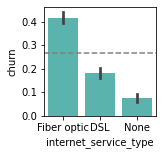


_____________________

contract_type 
_____________________

         chi2        p-value  degrees of freedom
0  673.953198  4.496997e-147                   2

observed:
 churn              0     1   All
contract_type                   
Month-to-month  1371   990  2361
One year         767   107   874
Two year         966    24   990
All             3104  1121  4225

expected:
              0           1
0  1734.566627  626.433373
1   642.105562  231.894438
2   727.327811  262.672189


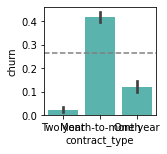


_____________________

payment_type 
_____________________

         chi2       p-value  degrees of freedom
0  412.264701  4.880175e-89                   3

observed:
 churn                         0     1   All
payment_type                               
Bank transfer (automatic)   758   157   915
Credit card (automatic)     787   133   920
Electronic check            783   657  1440
Mailed check                776   174   950
All                        3104  1121  4225

expected:
              0           1
0   672.227219  242.772781
1   675.900592  244.099408
2  1057.931361  382.068639
3   697.940828  252.059172


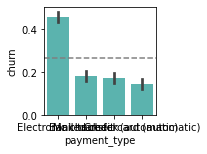


_____________________

tenure 
____________________



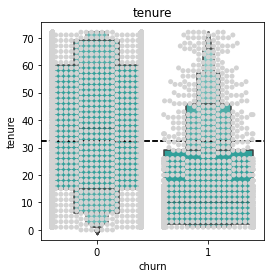

        count       mean        std  min   25%   50%    75%   max
churn                                                            
0      3104.0  37.432990  24.087859  0.0  15.0  37.0  60.25  72.0
1      1121.0  18.036574  19.485285  1.0   2.0  10.0  29.00  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2566280.0, pvalue=2.2758832595981456e-123)

____________________

monthly_charges 
____________________



KeyboardInterrupt: 

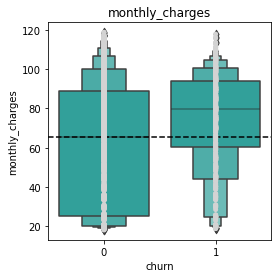

In [153]:
# let's call the function
e.explore_bivariate(train_temp, 'churn', cat_vars, quant_vars)